<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Conjugacy and the Beta-Binomial Model


---

## Learning Objectives


### Core

- Describe the concept of conjugate priors 
 - if we combine a given type of distribution for the likelihood function, we can choose a particular type of prior distribution and are guaranteed to get the same type for the posterior distribution)

- Describe what the binomial distribution models 
 - number of successes in n trials given the probability of success for each trial
 
- Understand that the maximum likelihood estimate (the MLE) for 'p' will be the fraction of successes observed in the data
- Describe what the beta distribution represents and where it fits into Bayes' formula
 - a distribution of probabilities here used as a prior

### Target

- [Recall the probability mass function for the binomial distribution](#pmf)
- [Recall the probability density function of the beta distribution](#beta-pdf)
- [Describe the difference between an informed and an uninformed prior](#beta-conjugate)

### Stretch

- [Derive the maximum likelihood estimate (the MLE) for 'p' from the probability mass function for a binomial distribution](#likelihood-func)
- [Derive how we obtain a posterior beta distribution from a binomial likelihood function and a beta prior distribution](#beta-conjugate)

### Lesson Guide
- [Introduction](#intro)
- [Review: the Binomial distribution probability mass function](#pmf)
- [Modeling the parameter $p$ given counts of successes and failures](#p)
- [The Binomial likelihood](#likelihood)
- [The "Maximum Likelihood Estimate" for $p$](#mle)
    - [The likelihood function](#likelihood-func)
    - [When the MLE does not make sense](#nonsense)
- [Bayesian modeling of the parameter $p$ and the Beta distribution](#beta)
- [The Beta PDF and the Beta function](#beta-pdf)
- [The Gamma function](#gamma)
- [Defining the Beta function in terms of the Gamma function](#beta-gamma)
- [Putting it all together: the Beta is a "conjugate prior" to the Binomial likelihood](#beta-conjugate)
- [Conclusions](#conclusions)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='intro'></a>
## Introduction
---

**Conjugacy** and **conjugate priors** are important concepts in Bayesian statistics. The essential idea is that the *posterior* distribution is guaranteed to have the same form as the *prior* distribution when the prior distribution is a conjugate prior to the likelihood function.

There are many conjugate priors and posteriors. They are extremely useful because they make the prior-posterior update algebraically solvable. When there is no conjugate prior, sampling techniques such as Markov Chain Monte Carlo are often necessary.

This lesson covers the most classic conjugate prior scenario: the Beta-Binomial model. Binomial models are appropriate for binary events. The prior distribution on the probability of a binary event is a Beta distribution. As it turns out, the Beta distribution is conjugate to the Binomial likelihood and we are guaranteed to get out a posterior distribution that is also a Beta distribution.

If all that does not sound very illuminating right now: don't worry. We will be walking through this in great detail.

<a id='pmf'></a>
## Review: the Binomial distribution probability mass function
---

Recall that the number of "success" trials in $n$ trials is modeled with the binomial distribution. The binomial distribution has the probability mass function:

$$ P(k \;|\; n, p) = \binom{n}{k} p^k (1 - p)^{n-k} $$

where $k$ is the number of successes,

$n$ is the total number of trials,

and $p$ is the probability of success on each trial.

**We can plot the probability mass function for a given $n$ and $p$:**

In [2]:
n = 25
p = 0.3

In [3]:
binom = stats.binom(n, p)
binom.pmf(8)

0.16507958113152404

In [4]:
def plot_binomial(n,p):
    binom = stats.binom(n, p)
    kvals = np.arange(0,n+1)
    probs = binom.pmf(kvals)

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(kvals, probs, align='center')
    ax.set_xlabel('k', fontsize=16)
    ax.set_ylabel('P(k | n,p)\n', fontsize=16)
    ax.set_title('Binomial PMF for n={}, p={}\n'.format(n,p), fontsize=18)
    plt.show()

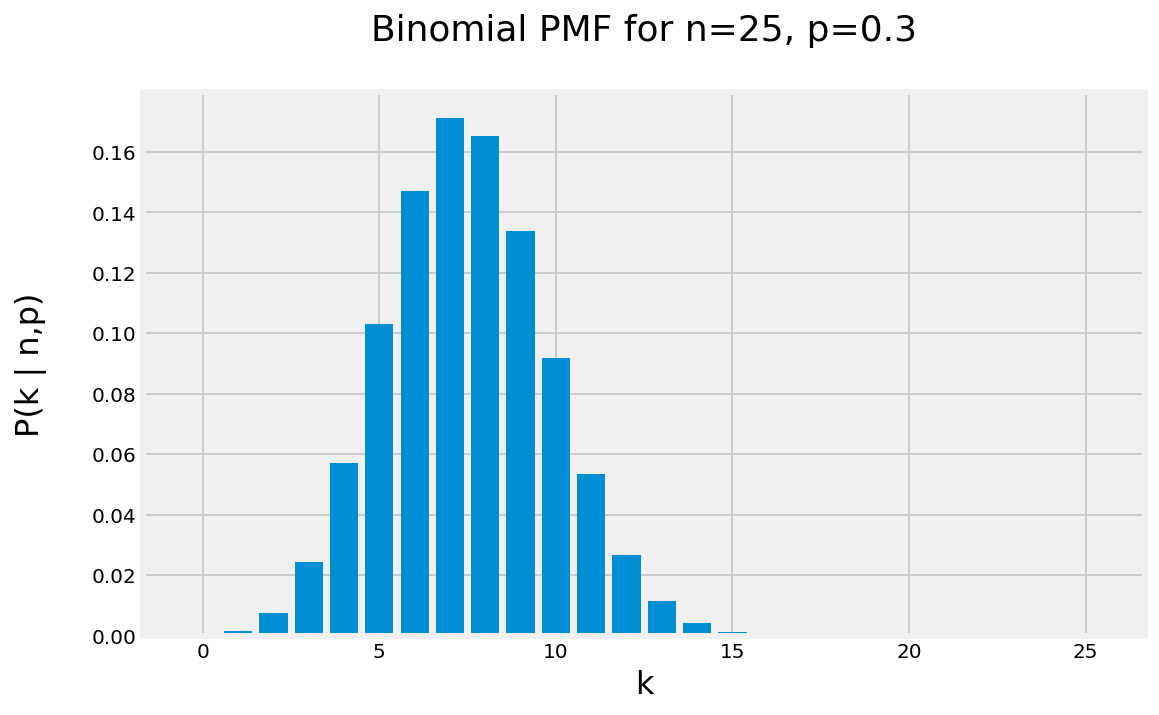

In [5]:
plot_binomial(n,p)

**If we change the probability of success $p$ (or if we wanted to the total trials $n$) we can see that the probability mass function changes - values of $k$ have different probabilities or likelihoods of occuring.**

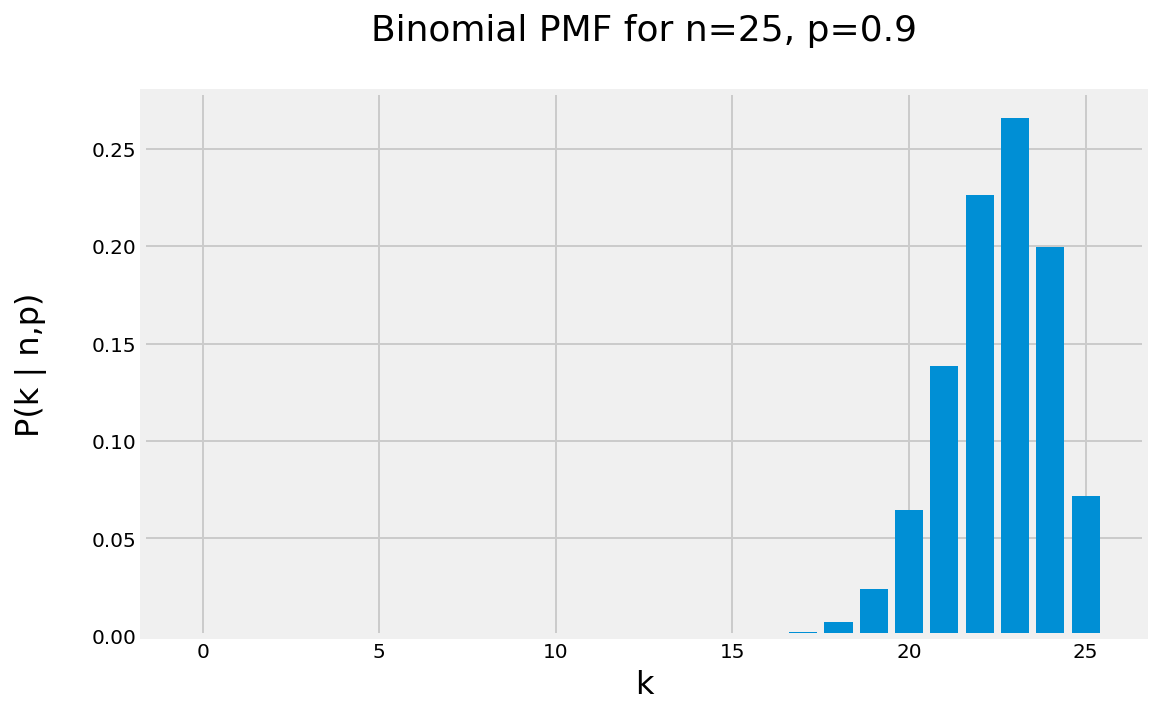

In [6]:
n, p = 25, 0.9
plot_binomial(n,p)

<a id='p'></a>
## Modeling the parameter $p$ given counts of successes and failures
---

Let's reframe this. 

Say instead that we were measuring visitors to our website and also whether they chose to subscribe to our newsletter or not. So we redefine $n$, $k$, and $p$ accordingly:

$$ \begin{aligned} n &= \text{number of visitors to our website} \\
k &= \text{number of visitors who subscribed} \\
p &= \text{probability of a visitor subscribing (unknown)} \end{aligned}$$

Remember, now we are _measuring_ $k$ subscribers out of the $n$ visitors. The measurement of subscribers can be considered as our data.

At this point, we want to make an inference about the parameter $p$, our probability of a visitor subscribing. We can talk about this in terms of Bayes' Theorem:

$$ P(p \;|\; data) = \frac{ P(data \;|\; p) }{ P(data) } P(p) $$

Or equivalently:

$$ P(p \;|\; n,k) = \frac{ P(n,k \;|\; p) }{ P(n, k) } P(p) $$

Where we have:

$$ \begin{aligned} 
P(p \;|\; n,k) &= \text{posterior} \\
P(n,k \;|\; p) &= \text{likelihood} \\
P(n,k) &= \text{marginal probability of the data} \\
P(p) &= \text{prior} 
\end{aligned} $$


<a id='likelihood'></a>
## The Binomial likelihood
---

Let's start with the likelihood. The likelihood represents the probability of observing $k$ successes out of $n$ trials _given a probability of success $p$._

This $p$ can be fixed, say at $p = 0.3$, in which case we would evaluate the likelihood at exactly that point. We could also represent $p$ as a distribution over the range of possible $p$ values and evaluate the likelihood at all of our different "hypotheses" about what $p$ could be. 

Let's start with a fixed value, $p = 0.3$. How do we evaluate the likelihood? As it turns out the likelihood function is the same as the probability mass function we wrote above, because this function is literally used to evaluate "what is the probability of $k$ successes given $n$ trials and probability $p$ of success". This is what we have formulated as the likelihood in the numerator.

**So we can use the binomial object initialized with $p = 0.3$ and $n = 25$ to find the likelihood value for a given $k$:**

In [7]:
p = 0.3
n = 25
binom = stats.binom(n, p)

In [8]:
binom.pmf(10)

0.09163601238321302

<a id='mle'></a>
## The "Maximum Likelihood Estimate" for $p$
---

If we were to _just_ focus on the likelihood part of Bayes' theorem, we could ask "what is the value of the parameter $p$ that maximises the value of the likelihood function?" This is precisely what we do in Frequentist statistics to find our point estimate of a parameter. 

Remember that Frequentists have no interest in the prior or posterior beliefs about the probability of the parameter's value. Frequentists state that there is no probability associated with a parameter (such as our probability of subscription). There is one, _true_ probability of subscription if we were to measure the entire population. 

Because we only take a sample of people, we may by chance measure a probability of subscription that deviates from that true probability to some degree. Remember: in Frequentist statistics, it is the data that has a probability rather than the parameter!

**For the Binomial distribution, we can easily calculate the value for subscription rate $p$ that makes our observed data the most likely: it is going to be the fraction of successes that we measured in our data.**

In [9]:
n = 25
k = 10
mle_p = float(k)/n
mle_p

0.4

<a id='likelihood-func'></a>
### The likelihood function

But we can also derive the MLE more formally. Our scenario is simple, but for distributions and models that are not so simple this becomes necessary.

**First, define the likelihood function $L$ (which is te same as the PMF):**

$$ L(n, k \;|\; p) = \binom{n}{k} p^k (1 - p)^{(n-k)} $$

**Take the logarithm of this to get the log likelihood.**

$$ LL(n, k \;|\; p) = \log\binom{n}{k} + k \cdot \log(p) + (n - k) \cdot \log(1 - p) $$


The log likelihood has nice properties. It allows the computer to do computations with very small probabilities multiplied together. It also gets rid of our exponents, which makes the derivative easier.

**Now take the derivative of the log likelihood with respect to $p$ and set this to 0.** This will find the value of $p$ that maximizes the log likelihood (the negative likelihood function is convex).

$$ \begin{aligned}
\frac{\partial}{\partial p} LL(n, k \;|\; p) &= 0 \\
\frac{k}{p} - \frac{(n-k)}{(1-p)} &= 0 \\
\frac{(n-k)}{(1-p)} &= \frac{k}{p} \\
pn - pk &= k - pk \\
pn - pk + pk &= k \\
p &= \frac{k}{n} \\
\end{aligned}$$

As you can see, this distills down to what we calculated before: the fraction of users that subscribed is the maximum likelihood estimate for the subscription rate.

#### Illustrating the likelihood function

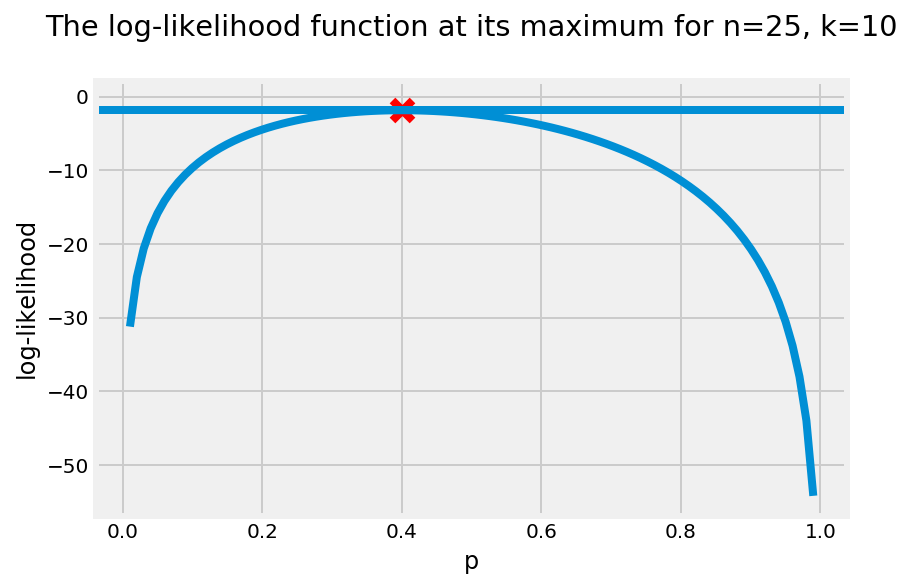

In [10]:
from scipy.special import comb

k = 10
n = 25
p = np.linspace(0.01,0.99,100)
y_values = np.log(comb(n,k))+k*np.log(p)+(n-k)*np.log(1-p)
plt.plot(p,y_values)
likelihood_max = k/float(n)
y_values_max = np.log(comb(n,k))+k*np.log(likelihood_max)+(n-k)*np.log(1-likelihood_max)
plt.axhline(y_values_max)
plt.scatter(likelihood_max,y_values_max,color='r',marker='x',s=100)
plt.title('The log-likelihood function at its maximum for n={}, k={}\n'.format(n,k))
plt.xlabel('p')
plt.ylabel('log-likelihood')
plt.show()

#### Check the result with sympy

In [11]:
import sympy as sym
sym.symbols('n k p')

# take the derivative of the log likelihood wrt p and simplify the result
likelihood_derivative = sym.simplify(
    sym.diff('log(binomial(n,k))+k*log(p)+(n-k)*log(1-p)',
             'p'))
print('Derivative of the likelihood function with respect to p:')
print(likelihood_derivative)
# set the derivative of the likelihood equal to zero and solve for p to obtain the MLE
mle = sym.solve(likelihood_derivative,'p')
print() 
print('Maximum likelihood estimate for p:')
print(mle[0])

Derivative of the likelihood function with respect to p:
(-k + n*p)/(p*(p - 1))

Maximum likelihood estimate for p:
k/n


<a id='nonsense'></a>
### When the MLE does not make sense

Now say instead we had $n = 5$ visitors to the site and to our surprise all of them subscribed, $k = 5$. Using the MLE for $p$ we would conclude that $p = 1.0$: a person has a 100 % probability of subscribing when reaching our site.

Of course this is a very flawed conclusion. We have only measured 5 people! 

> **Note:** If we took the Frequentist route, we would ask "what is the probability that we measured this parameter $p = 1.0$ by chance when in fact the true rate is (some predetermined null hypothesis value) $H0_p = 0.3$?" This would be our p-value, a.k.a. alpha or Type I error, and with such insufficient data we would almost certainly fail to reject the null hypothesis.

In [12]:
n = 5
k = 5
mle_p = 1.0

<a id='beta'></a>

## Bayesian modeling of the parameter $p$ and the Beta distribution
---

What if we took a Bayesian rather than frequentist approach?

Now, instead of thinking about the *data* as having a probability we think of the *parameter* $p$ as having a probability. In other words, different values of $p$ have different _likelihoods_. We will represent our beliefs about likely values of $p$ with our prior distribution.

**The distribution that represents _a distribution of probabilities_ is the Beta distribution. The beta distribution is parameterized by two values, $\alpha$ and $\beta$.**

$$ Beta(\alpha, \beta) =
\begin{cases}
\alpha &= \text{number of successes + 1} \\
\beta &= \text{number of failures + 1}
\end{cases} $$

We can plot the beta distribution for the scenario where we measured $k = 5$ out of $n = 5$:

In [13]:
successes = 5
failures = 0

In [14]:
def plot_beta(successes,failures):
    
    # instantiate the beta distribution from scipy.stats
    beta = stats.beta(successes+1, failures+1)
    
    # create a range of x-values (pvals) for plotting
    pvals = np.linspace(0.,1.,100)
    # calculate the beta-pdf values corresponding to the pvals
    like = beta.pdf(pvals)
    
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(pvals, like, lw=3)
    ax.set_xlabel('p', fontsize=16)
    ax.set_ylabel(r'Pdf(p | $\alpha$,$\beta$)'+'\n', fontsize=16)
    ax.set_title(r'Beta PDF for $\alpha$={}, $\beta$={}'.format(
        successes+1,failures+1)+'\n', fontsize=18)
    plt.show()

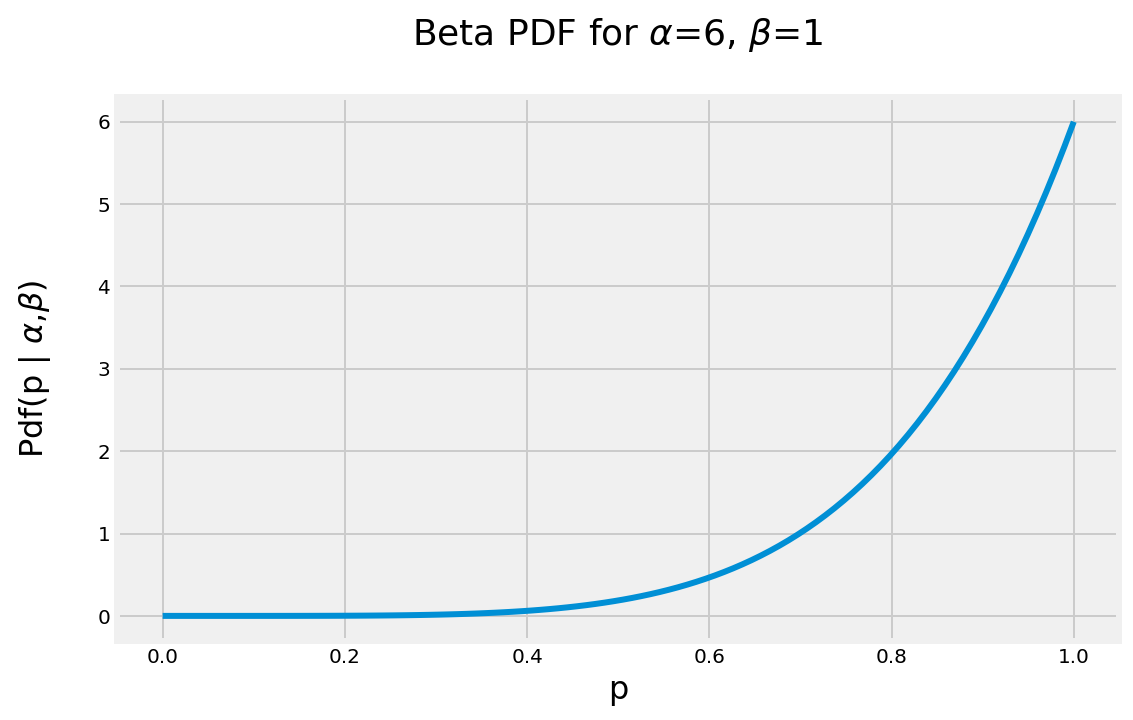

In [15]:
plot_beta(successes,failures)

**We can see from this distribution that our probability with the highest likelihood is 1.0. But, other probabilities are also likely!**  Due to our low sample size $n$, many values other than $p = 1.0$ have reasonable likelihood.

**What if we measured 20 subscriptions out of 20 visitors?** Plot this scenario below to see how the beta distribution changes.

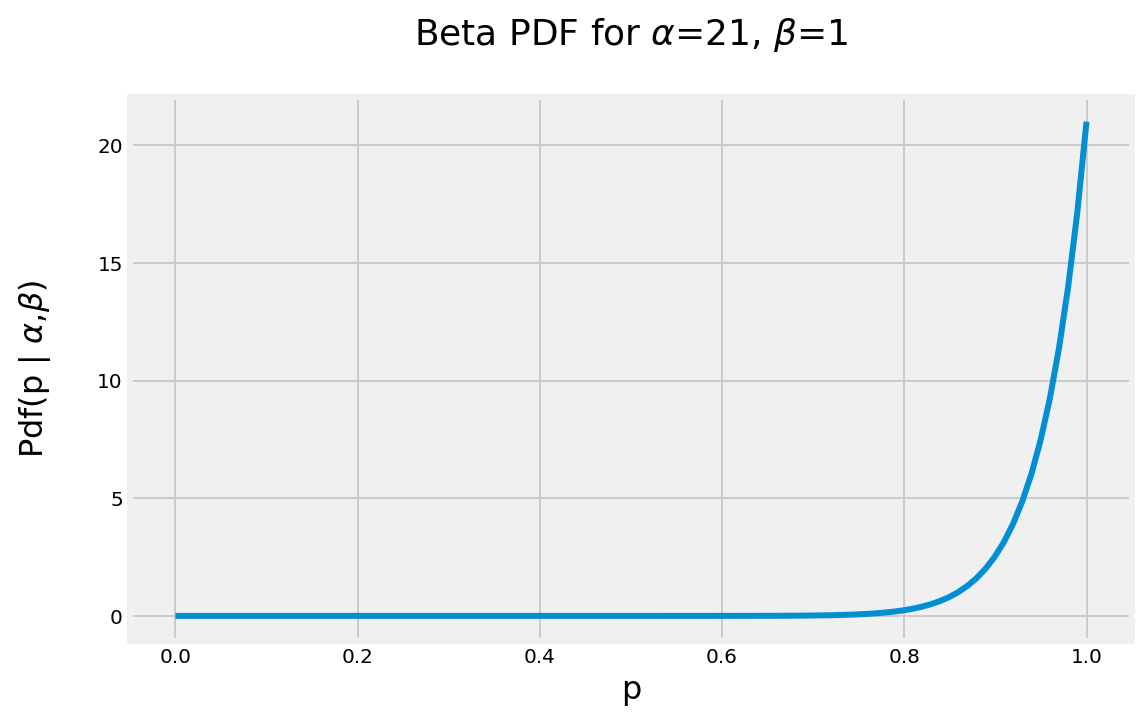

In [16]:
successes = 20
failures = 0
plot_beta(successes,failures)

<a id='beta-pdf'></a>
## The Beta PDF and the Beta function
---

This is all well and good, but how is the Beta distribution defined? Formally, we define the probability density function of the beta distribution as:

$$ PDF_{Beta}(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{\int_0^1 u^{\alpha-1} (1-u)^{\beta-1}\, du} $$

where $x$ falls in the range [0, 1], and $u$ represents the values in that range to integrate over.

In the denominator, we are integrating over the possible probabilities. The denominator of the PDF is actually called the "Beta function", not to be confused with the Beta _distribution_. 

If this looks familiar to the equation for the binomial likelihood above, it's because it is. In the numerator we essentially have the binomial likelihood equation but with the "shape" parameters $\alpha$ and $\beta$ in place of our $k$ and $n$. In the denominator, we are integrating the binomial likelihood.


<a id='gamma'></a>
## The Gamma function
---

The Gamma function is a generalization of the factorial to the continuum.

The gamma function is defined as:

$$ \Gamma(z) =
\int_0^{\infty} x^{z-1} e^{-x} dx 
$$

for complex numbers $z$.

For positive integers, the evaluation of the integral gives 

$$\Gamma(z)=(z-1)!$$

In general one has $\Gamma(z+1)=z\,\Gamma(z)$ and $\Gamma(1)=1$.

<a id='beta-gamma'></a>
## Definining the Beta function using the Gamma function
---

The Beta _function_ can also be written in terms of the Gamma function:

$$ Beta(\alpha, \beta) = \frac{ \Gamma (\alpha) \Gamma (\beta) }{\Gamma (\alpha + \beta) } = \int_0^1 u^{\alpha-1} (1-u)^{\beta-1}\, du $$

At this point, we can rewrite the Beta _distribution_, or probability density function, in the following way:

$$ PDF_{Beta}(x) = \frac{\Gamma (\alpha + \beta) }{ \Gamma (\alpha) \Gamma (\beta) }x^{\alpha-1}(1-x)^{\beta-1} $$

This is useful for calculating the prefactor from given integers $\alpha$ and $\beta$.

<a id='beta-conjugate'></a>
## Putting it all together: the Beta is a "conjugate prior" to the Binomial likelihood
---

So remember - our beta distribution is what we are going to be using as our _prior_ over the probability of subscription $p$. In other words, we have some distribution of beliefs about which subscription rates are most likely as represented by a beta distribution.

Recall now the setup of this problem in terms of Bayes' formula:

$$ P(p \;|\; n,k) = \frac{ P(n,k \;|\; p) }{ P(k, n) } P(p) $$

Let's ignore the normalizing constant, the marginal probability of the data $k,n$, for now. We can say then the unnormalized posterior is:

$$ P(p \;|\; n,k) \propto P(n,k \;|\; p) \cdot P(p) $$

And we can put our Binomial likelihood and the Beta prior in:

$$ 
P(p \;|\; n,k) 
\propto
\binom{n}{k} p^k (1 - p)^{n-k} \cdot \frac{\Gamma (\alpha_{\rm prior} + \beta_{\rm prior}) }{ \Gamma (\alpha_{\rm prior}) \Gamma (\beta_{\rm prior}) }p^{\alpha_{\rm prior}-1}(1-p)^{\beta_{\rm prior}-1}
$$

Reordering terms, this is the same as

$$
P(p \;|\; n,k) 
\propto 
\binom{n}{k} \,
\frac{\Gamma (\alpha_{\rm prior} + \beta_{\rm prior}) }{ \Gamma (\alpha_{\rm prior}) \Gamma (\beta_{\rm prior}) } \,
p^k (1 - p)^{n-k}\, p^{\alpha_{\rm prior}-1}(1-p)^{\beta_{\rm prior}-1}
$$

Let's now define a constant $c$ as:

$$ c = \binom{n}{k} \cdot 
\frac{\Gamma (\alpha_{\rm prior} + \beta_{\rm prior}) }
{ \Gamma (\alpha_{\rm prior}) \Gamma (\beta_{\rm prior}) } $$

Now our formula for the unnormalized posterior is:

$$ \begin{aligned}
P(p \;|\; n,k) &\propto c \cdot p^k (1 - p)^{n-k} \cdot p^{\alpha_{\rm prior}-1}(1-p)^{\beta_{\rm prior}-1} \\
P(p \;|\; n,k) &\propto c \cdot p^{k + \alpha_{\rm prior} - 1} (1-p)^{n - k + \beta_{\rm prior} - 1}
\end{aligned}
$$

And if we define a new alpha and beta

$$ \begin{aligned}
\alpha_{\rm posterior} &=  k+\alpha_{\rm prior} \\
\beta_{\rm posterior} &= n-k+\beta_{\rm prior}
\end{aligned} $$

**we can see that the posterior distribution can in fact be parameterized as a Beta distribution.** The constant term $c$ will be handled when we put the marginal likelihood back in and normalize the posterior distribution to be a proper probability distribution.

The properly normalized posterior distribution is then

$$ P(p|n,k)=
\frac{\Gamma(n+\alpha_{\rm prior}+\beta_{\rm prior})}{\Gamma(k+\alpha_{\rm prior})\Gamma(n-k+\beta_{\rm prior})}
p^{k+\alpha_{\rm prior}-1}(1-p)^{n-k+\beta_{\rm prior}-1}
$$

Having recognized that binomial distribution and beta distribution are conjugate priors, by combining the two as likelihood distribution and prior distribution we know that the posterior distribution is a beta distribution, and we can calculate its shape parameters straight-forwardly without having to solve complicated integrals. In this case, the original parameters of the beta distribution are simply shifted.

As an example, imagine that we do not know anything about the parameter for the probability in the binomial likelihood function. Therefore we assume a uniform distribution on the interval $[0,1]$ for the probability $p$, which we obtain by setting $\alpha=\beta=1$ in the prior Beta distribution.

Then observing in a sample of size $n=10$, $k=5$ successes, we can calculate the posterior Beta distribution as above. 

Plotting prior and posterior distributions, we get:

In [17]:
def prior_posterior_plot(n,k,alpha,beta):

    # instantiate the prior beta distribution with shape parameters alpha, beta
    beta_prior = stats.beta(alpha, beta)
    # instantiate the posterior beta distribution with shape parameters shifted by n and k
    beta_posterior = stats.beta(alpha+k, beta+n-k)

    # set up x and y-values for plotting 
    pvals = np.linspace(0.,1.,100)
    prior = beta_prior.pdf(pvals)
    posterior = beta_posterior.pdf(pvals)
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    ax.plot(pvals, prior, lw=3,
            label='Prior Beta PDF for\n'+r'$\alpha={}$, $\beta={}$'.format(
            alpha,beta)+'\n'
           )
    ax.plot(pvals, posterior, lw=3,
            label='Posterior Beta PDF for\n'+r'$\alpha+k={}$, $\beta+n-k={}$'.format(
            alpha+k,beta+n-k)+'\n'
           )
    ax.set_xlabel('p', fontsize=16)
    ax.set_ylabel(r'Pdf(p | $\alpha$, $\beta$)'+'\n', fontsize=16)
    ax.set_title('Posterior and prior Beta PDF', fontsize=18)
    plt.legend(loc='upper right')
    plt.show()

#### Uninformed prior distribution (uniform)

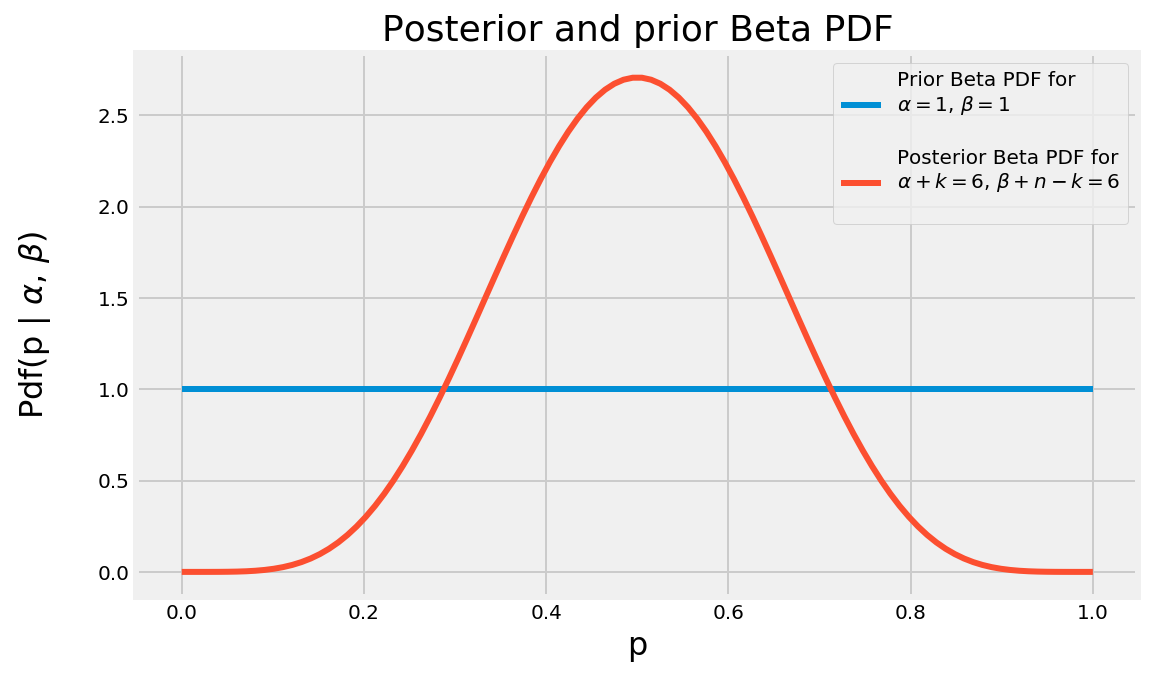

In [18]:
alpha = 1
beta = 1
n = 10
k = 5
prior_posterior_plot(n,k,alpha,beta)

The mean remains the same, but the standard deviation changes:

In [19]:
def beta_prior_posterior(n,k,alpha,beta):
    
    beta_prior = stats.beta(alpha, beta)
    beta_posterior = stats.beta(alpha+k, beta+n-k)
    print('Mean of the prior:\t\t\t', beta_prior.mean())
    print('Mean of the posterior:\t\t\t', beta_posterior.mean())
    print('Standard deviation of the prior:\t', beta_prior.std())
    print('Standard deviation of the posterior:\t', beta_posterior.std())

In [20]:
beta_prior_posterior(n,k,alpha,beta)

Mean of the prior:			 0.5
Mean of the posterior:			 0.5
Standard deviation of the prior:	 0.28867513459481287
Standard deviation of the posterior:	 0.1386750490563073


#### Informed prior distribution

Now assume instead for the probability in the binomial likelihood function a prior Beta distribution with $\alpha=3$, $\beta=4$.

Then we observe that in a sample of size $n=10$ we have $k=2$ successes, and again we can calculate the posterior Beta distribution as above. 

Plotting prior and posterior distributions, we get:

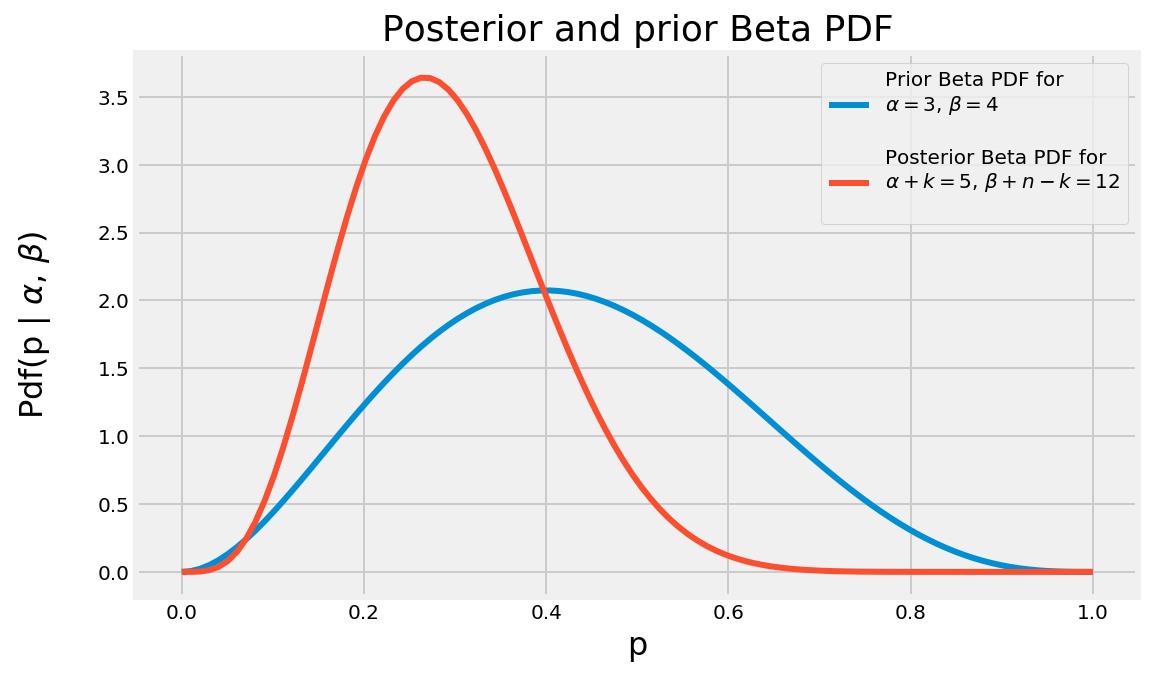

In [21]:
alpha = 3
beta = 4
n = 10
k = 2

prior_posterior_plot(n,k,alpha,beta)

Mean and standard deviation change:

In [22]:
beta_prior_posterior(n,k,alpha,beta)

Mean of the prior:			 0.42857142857142855
Mean of the posterior:			 0.29411764705882354
Standard deviation of the prior:	 0.1749635530559413
Standard deviation of the posterior:	 0.10739657990297374


#### Putting more weight on large or small probabilities

The parameters of the beta distribution don't have to be integers. For example the Beta distribution with $\alpha=\beta=0.5$ is called Jeffrey's prior. Like the uniform prior it would be used if there is not much prior information available, but one expects to have either a lot of successes or failures.

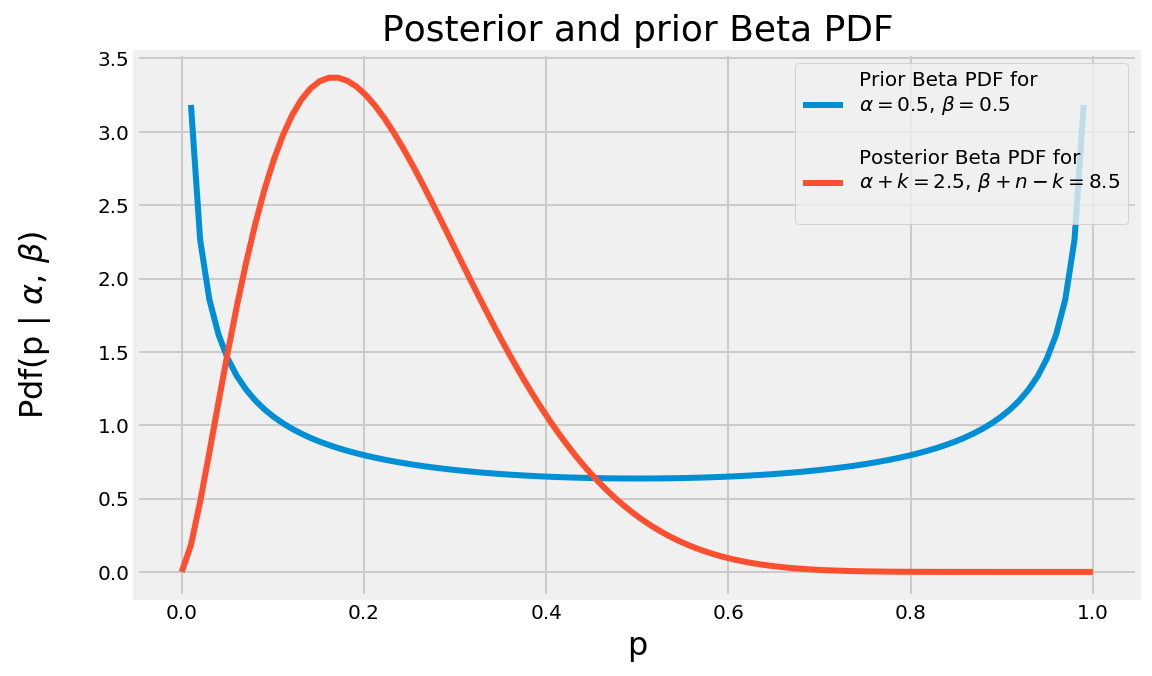

In [23]:
alpha = 0.5
beta = 0.5
n = 10
k = 2

prior_posterior_plot(n,k,alpha,beta)

In [24]:
beta_prior_posterior(n,k,alpha,beta)

Mean of the prior:			 0.5
Mean of the posterior:			 0.22727272727272727
Standard deviation of the prior:	 0.3535533905932738
Standard deviation of the posterior:	 0.12097514714144933


You can check that your distributions are properly normalised by integrating from 0 to 1.

In [25]:
from scipy import integrate

my_beta = lambda x: stats.beta(0.5,0.5).pdf(x)
integrate.quad(my_beta,0,1)

(1.0000000000000246, 1.9757739888603965e-10)

<a id='conclusions'></a>
## Conclusions

Knowing about conjugate priors allows you to calculate the shape parameters for posterior distributions in a purely algebraic way without having to solve integrals or create samples.
Similar pairs of conjugate priors have been found for many distributions. 
Have a look [here](https://en.wikipedia.org/wiki/Conjugate_prior) for further pairs.

We will soon see how to obtain posterior distributions if we cannot resort to these simple methods.